In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d damingo1/spill-data

 76% 9.00M/11.9M [00:00<00:00, 94.3MB/s]
100% 11.9M/11.9M [00:00<00:00, 114MB/s] 


In [ ]:
!unzip /content/spill-data.zip

Archive:  /content/spill-data.zip
  inflating: Spill_Data/Test/NoSpill_001.jpg  
  inflating: Spill_Data/Test/NoSpill_002.jpg  
  inflating: Spill_Data/Test/NoSpill_003.jpg  
  inflating: Spill_Data/Test/NoSpill_004.jpg  
  inflating: Spill_Data/Test/NoSpill_005.jpg  
  inflating: Spill_Data/Test/NoSpill_006.jpg  
  inflating: Spill_Data/Test/NoSpill_007.jpg  
  inflating: Spill_Data/Test/NoSpill_008.jpg  
  inflating: Spill_Data/Test/NoSpill_009.jpg  
  inflating: Spill_Data/Test/NoSpill_010.jpg  
  inflating: Spill_Data/Test/NoSpill_011.jpg  
  inflating: Spill_Data/Test/NoSpill_012.jpg  
  inflating: Spill_Data/Test/NoSpill_013.jpg  
  inflating: Spill_Data/Test/NoSpill_014.jpg  
  inflating: Spill_Data/Test/NoSpill_015.jpg  
  inflating: Spill_Data/Test/NoSpill_016.jpg  
  inflating: Spill_Data/Test/NoSpill_017.jpg  
  inflating: Spill_Data/Test/NoSpill_018.jpg  
  inflating: Spill_Data/Test/NoSpill_027.jpg  
  inflating: Spill_Data/Test/NoSpill_028.jpg  
  inflating: Spill_Data/Te

In [ ]:
# Import python libraries

# code start here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing ,model_selection
import tensorflow as tf
import os
import glob
# code end here

In [ ]:
x='/content/Spill_Data/Train/NoSpill_012.jpg'
if 'NoSpill' in x:
    print('yes')

yes


In [ ]:
def read_data(folder_path,folder_type):

    # Create the arrays that will hold the paths and labels
    image_paths = []
    image_labels = []
    paths=folder_path+'/'+folder_type+'/*.jpg'
    # os.listdir returns an array of the files or directories in the specified path

            # Create the full path of the image
    images_path = glob.glob(paths)
    for image_path in images_path:
                   # Assign the label depending on the directory, 0 for cats and 1 for dogs
        if 'NoSpill' in image_path:
            image_label = 1 
        
        else:
            image_label=0
            
            # Append the image path and label to the arrays we defined earlier
        image_paths.append(image_path)
        image_labels.append(image_label)

    # Convert the arrays to Numpy arrays
    image_paths = np.array(image_paths)
    image_labels = np.array(image_labels)
    
    # Return the tuple
    return image_paths, image_labels

In [ ]:
train_data,train_label=read_data('/content/Spill_Data','Train')

test_data,test_label=read_data('/content/Spill_Data','Test')
train_label

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
#create tensor read_image from folder
def read_image(x,y):
    x=tf.io.read_file(x)
    x=tf.image.decode_jpeg(x)
    x=tf.image.convert_image_dtype(x,tf.float32)
    x=tf.image.resize(x,(224,224))

    return x,y


In [ ]:
# This is the same function that was defined in the CIFAR10 example


def augment_image(image, label):

    image = tf.image.random_flip_left_right(
        image
    )  # Randomly flip an image horizontally
   # image = tf.image.random_flip_up_down(image)  # Randomly flips an image vertically
    image = tf.image.random_brightness(
        image, max_delta=32.0 / 255.0
    )  # Adjust the brightness of images by a random factor
    image = tf.image.random_saturation(
        image, lower=0.5, upper=1.5
    )  # Adjust the saturation of RGB images by a random factor

    # Make sure the image's pixel values are still between 0 and 1
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image, label

# create pipeline

In [ ]:
def create_pipeline(x,y,training=False):
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.map(read_image,num_parallel_calls=tf.data.AUTOTUNE)
    if training:
        data=data.map(augment_image,num_parallel_calls=tf.data.AUTOTUNE)
    data=data.shuffle(2000)
    data=data.batch(32,num_parallel_calls=tf.data.AUTOTUNE)
    data=data.prefetch(tf.data.AUTOTUNE)  
    return data  


In [ ]:
train_dataset=create_pipeline(train_data,train_label,training=True)
test_dataset=create_pipeline(test_data,test_label)

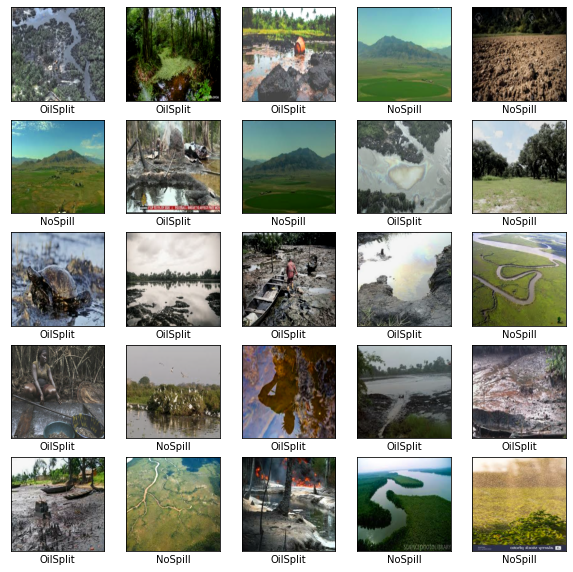

In [ ]:
class_names = ["OilSplit", "NoSpill"]

for x, y in train_dataset.take(1):

    plt.figure(figsize=(10, 10))

    for i in range(25):
        plt.subplot(5, 5, i + 1)  # Create a subplot on a 5x5 grid for index i

        plt.xticks([])  # Remove the ticks of the number line from the x axis
        plt.yticks([])  # Remove the ticks of the number line from the y axis

        plt.imshow(
            x[i]
        )  # Plot the image, no need to use the cmap parameter since this image is in RGB

        plt.xlabel(class_names[y[i]])  # Add the class name below the image

# Using pretrained model

In [ ]:
pretraining_model=tf.keras.applications.ResNet50(include_top=False,pooling='avg',input_shape=(224,224,3))
pretraining_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

# build model

In [ ]:
input=tf.keras.layers.Input(shape=(224,224,3))
x=pretraining_model(input,training=True)

x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)

output=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(input,output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 24,702,593
Trainable params: 24,649,473
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"]
)
save_best_model_collback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/model", save_best_only=True
)
model.fit(train_dataset, epochs=50, validation_data=test_dataset , callbacks=[save_best_model_collback])

Epoch 1/50
10/10 [==============================] - 176s 17s/step - loss: 3.1144 - accuracy: 0.5467 - val_loss: 0.7015 - val_accuracy: 0.3750
Epoch 2/50
10/10 [==============================] - 166s 17s/step - loss: 0.7189 - accuracy: 0.5533 - val_loss: 0.7039 - val_accuracy: 0.3750
Epoch 3/50
10/10 [==============================] - 165s 17s/step - loss: 0.7044 - accuracy: 0.5400 - val_loss: 0.6934 - val_accuracy: 0.3750
Epoch 4/50
10/10 [==============================] - 166s 17s/step - loss: 0.7172 - accuracy: 0.5467 - val_loss: 0.6699 - val_accuracy: 0.6250
Epoch 5/50
10/10 [==============================] - 165s 17s/step - loss: 0.6965 - accuracy: 0.5200 - val_loss: 0.6639 - val_accuracy: 0.6250
Epoch 6/50
10/10 [==============================] - 165s 17s/step - loss: 0.6890 - accuracy: 0.5600 - val_loss: 0.6806 - val_accuracy: 0.6250
Epoch 7/50
10/10 [==============================] - 165s 16s/step - loss: 0.6926 - accuracy: 0.5600 - val_loss: 0.6831 - val_accuracy: 0.6250
Epoch 

# plot accuracy

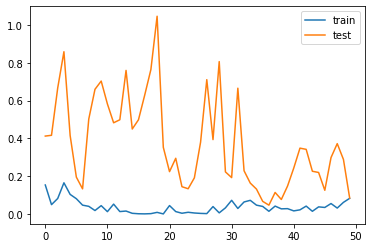

In [ ]:
## plot the overfitting
plt.plot(model.history.history['loss'],label='train')
plt.plot(model.history.history['val_loss'],label='test')
plt.legend()
plt.show()


# load best model

In [ ]:
model=tf.keras.models.load_model('/content/model')
loss, accuracy =model.evaluate(test_dataset,verbose=2)

4/4 - 2s - loss: 0.0653 - accuracy: 0.9821 - 2s/epoch - 409ms/step


# Display a confusion matrix

In [ ]:
dataset=test_dataset.take(1)
x_test,y_test=dataset.as_numpy_iterator().next()
pred=model.predict(x_test)
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    else:
        pred[i]=0
pred

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

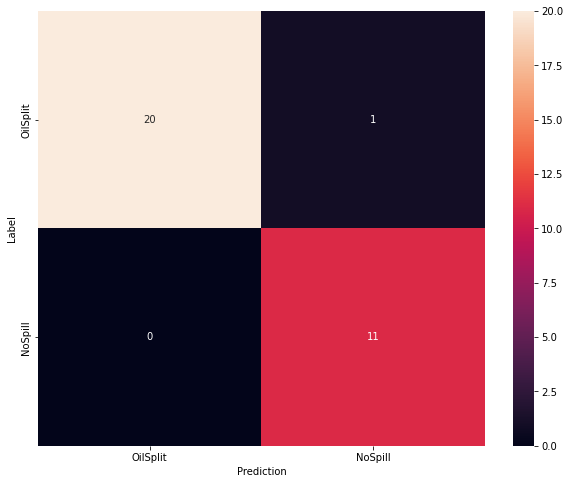

In [ ]:
import seaborn as sns
confusion_mtx = tf.math.confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=class_names,
            yticklabels=class_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

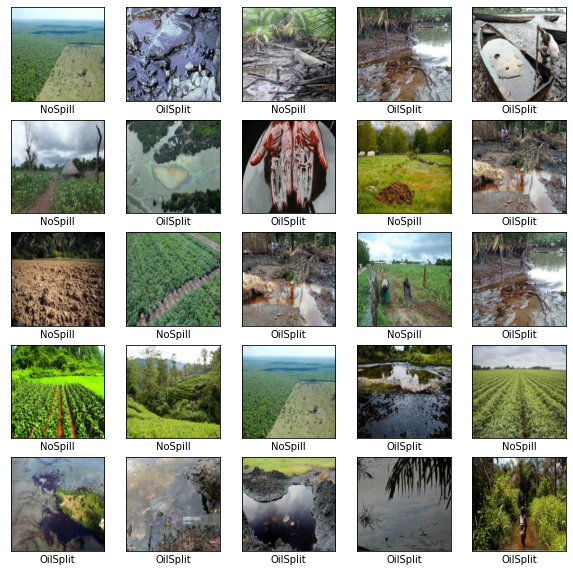

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a subplot on a 5x5 grid for index i

    plt.xticks([])  # Remove the ticks of the number line from the x axis
    plt.yticks([])  # Remove the ticks of the number line from the y axis

    plt.imshow(
        x_test[i]
    )  # Plot the image, no need to use the cmap parameter since this image is in RGB
    plt.xlabel(class_names[int(pred[i])])  # Add the class name below the image